In [5]:
!pip install pandas


In [39]:
!pip install seaborn



   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 4.0 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 4.0 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 5.0 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 5.0 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 4.4 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 4.1 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 3.8 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 3.4 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 3.2 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 3.2 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 3.1 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 2.9 MB/s eta 0:00:01
   ----------------

In [84]:
pip install sweetviz

   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
    --------------------------------------- 0.3/15.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/15.1 MB 2.0 MB/s eta 0:00:08
   --- ------------------------------------ 1.3/15.1 MB 2.3 MB/s eta 0:00:07
   ---- ----------------------------------- 1.8/15.1 MB 2.4 MB/s eta 0:00:06
   ------ --------------------------------- 2.6/15.1 MB 2.7 MB/s eta 0:00:05
   --------- ------------------------------ 3.4/15.1 MB 2.9 MB/s eta 0:00:05
   ----------- ---------------------------- 4.2/15.1 MB 3.0 MB/s eta 0:00:04
   ------------- -------------------------- 5.2/15.1 MB 3.2 MB/s eta 0:00:04
   ----------------- ---------------------- 6.6/15.1 MB 3.5 MB/s eta 0:00:03
   -------------------- ------------------- 7.6/15.1 MB 3.7 MB/s eta 0:00:03
   ----------------------- ---------------- 8.9/15.1 MB 3.9 MB/s eta 0:00:02
   --------------------------- ------------ 10.2/15.1 MB 4.1 MB/s eta 0:00:02
   ---------

In [640]:
# pip install dateparser


In [673]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import requests
import time
from requests.auth import HTTPBasicAuth
from urllib.parse import quote
from fuzzywuzzy import fuzz



#df.head()

In [672]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

directory = os.getcwd()

# Define the start and end strings
start_string = 'CompanyV2 (July 2025)'
end_string = '.csv'

matching_files = [
    filename for filename in os.listdir(directory)
    if os.path.isfile(os.path.join(directory, filename)) and
       filename.startswith(start_string) and
       filename.endswith(end_string)
]

# Output the matching files
print(matching_files)
for file in matching_files:
    df = pd.read_csv(file)


['CompanyV2 (July 2025).csv']


In [661]:
#Option 1 use automatic profiling
# import sweetviz as sv
# import warnings
# np.VisibleDeprecationWarning = np.exceptions.VisibleDeprecationWarning
# np.warnings = warnings  


# report = sv.analyze(df)
# report.show_html("sweetviz_report.html")
                  
                                                                 

In [662]:
#clean column names and display nulls
display(df.columns)
df.columns = df.columns.str.strip()


Index(['CompanyName', ' CompanyNumber', 'RegAddress.CareOf',
       'RegAddress.POBox', 'RegAddress.AddressLine1',
       ' RegAddress.AddressLine2', 'RegAddress.PostTown', 'RegAddress.County',
       'RegAddress.Country', 'RegAddress.PostCode', 'CompanyCategory',
       'CompanyStatus', 'CountryOfOrigin', 'DissolutionDate',
       'IncorporationDate', 'Accounts.AccountRefDay',
       'Accounts.AccountRefMonth', 'Accounts.NextDueDate',
       'Accounts.LastMadeUpDate', 'Accounts.AccountCategory',
       'Returns.NextDueDate', 'Returns.LastMadeUpDate',
       'Mortgages.NumMortCharges', 'Mortgages.NumMortOutstanding',
       'Mortgages.NumMortPartSatisfied', 'Mortgages.NumMortSatisfied',
       'SICCode.SicText_1', 'SICCode.SicText_2', 'SICCode.SicText_3',
       'SICCode.SicText_4', 'LimitedPartnerships.NumGenPartners',
       'LimitedPartnerships.NumLimPartners', 'URI', 'PreviousName_1.CONDATE',
       ' PreviousName_1.CompanyName', ' PreviousName_2.CONDATE',
       ' PreviousName_2.C

In [670]:
address_cols = [
    col for col in df.columns
    if col.startswith("RegAddress.") and col not in {"RegAddress.CareOf"}
]# df[address_cols].head()

accounts_cols = [col for col in df.columns if col.startswith("Accounts.")]
#df[accounts_cols].head()

returns_cols = [col for col in df.columns if col.startswith("Returns.")]
#df[returns_cols].head()

mortgages_cols = [col for col in df.columns if col.startswith("Mortgages.")]
#df[mortgages_cols].head()

siccode_cols = [col for col in df.columns if col.startswith("SICCode.")]
#df[siccode_cols].head()

limitpart_cols = [col for col in df.columns if col.startswith("LimitedPartnerships.")]
#df[limitpart_cols].head()

previousname_cols = [col for col in df.columns if col.startswith("PreviousName_")]
#df[limitpart_cols].head()
prefixed_cols= (address_cols+accounts_cols+returns_cols+mortgages_cols+siccode_cols+limitpart_cols+previousname_cols)
company_info_cols = df.columns.difference(prefixed_cols)




In [664]:
# Profiling
def profile_dataframe_as_df(
    df: pd.DataFrame,
    dup_key: str = None,
    date_format: str = '%d/%m/%Y',
    rules: dict = None
) -> pd.DataFrame:
    import re
    
    sections = {}

    # 1. Data types
    sections['dtypes'] = df.dtypes.rename("DataType").to_frame()

    # 2. Missing values and percentage
    miss = df.isnull().sum().rename("Missing")
    miss_pct = (miss / len(df) * 100).round(2).rename("MissingPct")
    sections['missing'] = pd.concat([miss, miss_pct], axis=1)

    # 3. Unique values, sorted
    sections['unique'] = (df.nunique().rename("Unique").to_frame().sort_values(by="Unique", ascending=False)
    )

    # 4. Most frequent values
    freq = {}
    for col in df.columns:
        m = df[col].mode(dropna=True)
        freq[col] = m.iloc[0] if not m.empty else pd.NA
    sections['frequent'] = pd.Series(freq, name="MostFrequent").to_frame()

    # 5. Numeric summary
    sections['numeric'] = df.describe().transpose()

    # 6. Outliers using IQR method
    def outlier_count(s):
        if pd.api.types.is_numeric_dtype(s):
            q1, q3 = s.quantile([0.25, 0.75])
            iqr = q3 - q1
            return ((s < q1 - 1.5 * iqr) | (s > q3 + 1.5 * iqr)).sum()
        return pd.NA
    numeric_cols = df.select_dtypes(include='number').columns
    outlier_series = df[numeric_cols].apply(outlier_count)
    sections['outliers'] = outlier_series.rename("OutlierCount").to_frame()

    # Profile Duplicates
    if dup_key and dup_key in df.columns:
        total_rows = len(df)
        is_dup_excl_first = df.duplicated(subset=[dup_key], keep='first')
        is_dup_group = df.duplicated(subset=[dup_key], keep=False)
        dup_excl_first_count = is_dup_excl_first.sum()
        dup_total_rows = is_dup_group.sum()
        dup_pct = (dup_total_rows / total_rows * 100) if total_rows > 0 else 0
        sections['duplicates'] = pd.DataFrame({
            'TotalRows': [total_rows],
            'Duplicates(excl_first)': [dup_excl_first_count],
            'TotalDupRows': [dup_total_rows],
            'DuplicatePct': [round(dup_pct, 2)]
        })
    else:
        sections['duplicates'] = pd.DataFrame(columns=[
            'TotalRows', 'Duplicates(excl_first)', 'TotalDupRows', 'DuplicatePct'
        ])

    # Invalid dates detection
    date_cols = [c for c in df.columns if 'date' in c.lower()]
    
    inv_counts = {}
    inv_values = {}
    
    for col in date_cols:
        s = df[col].astype(str).fillna('')
        # Try to convert all entries; invalid ones become NaT
        dt = pd.to_datetime(s, format='%d/%m/%Y', errors='coerce')
        
        # Invalid date strings are those where parsing failed but the input wasn't empty or 'nan'/'none'
        mask = dt.isna() & s.str.strip().ne('') & ~s.str.lower().isin(['nan', 'none'])
        
        inv_counts[col] = int(mask.sum())
        inv_values[col] = s[mask].unique().tolist()
    
    sections['invalid_dates'] = pd.Series(inv_counts, name="InvalidDateCount").to_frame()
    sections['invalid_date_vals'] = pd.DataFrame({
        col: [", ".join(vals)] for col, vals in inv_values.items()
    })

    # Invalid Address
     #Address Summary
    address_cols = [
        col for col in df.columns 
        if col.startswith('RegAddress.') and col not in ['RegAddress.CareOf', 'RegAddress.POBox']
    ]
    existing_address_cols = [col for col in address_cols if col in df.columns]
    
    # Construct full address (optional, but can be useful)
    df['full_address'] = df[existing_address_cols].apply(
        lambda row: ', '.join(row.dropna().astype(str).str.strip()), axis=1
    )
    
    # Score completeness
    df['address_completeness_score'] = df[existing_address_cols].map(
        lambda x: pd.notnull(x) and x is not None and str(x).strip() != ''
    ).sum(axis=1)
    
    df['address_completeness_pct'] = (
        df['address_completeness_score'] / len(existing_address_cols) * 100
    )
    
    # Summary only
    total = len(df)
    complete = (df['address_completeness_score'] == len(existing_address_cols)).sum()
    incomplete = total - complete
    completeness_pct = round((complete / total) * 100, 2) if total > 0 else 0.0
    
    sections['address_completeness'] = pd.DataFrame([{
        'TotalRows': total,
        'CompleteAddresses': complete,
        'IncompleteAddresses': incomplete,
        'CompletenessPct': completeness_pct
    }])

    # Invalid postal codes
    postcode_re = re.compile(
        r'^(GIR 0AA|[A-Z]{1,2}[0-9][0-9A-Z]? ?[0-9][ABD-HJLNP-UW-Z]{2})$'
    )
    pc = df['RegAddress.PostCode'].astype(str).str.strip()
    mask_invalid_pc = pc.ne('').fillna(False) & ~pc.str.fullmatch(postcode_re, na=False)
    invalid_pc = pc[mask_invalid_pc]
    sections['invalid_postcodes'] = invalid_pc.to_frame(name='InvalidPostCodeSample')

    # Apply custom rules if provided
    if rules:
        for rule_name, rule_func in rules.items():
            try:
                result = rule_func(df)
                if isinstance(result, pd.DataFrame):
                    sections[rule_name] = result.copy()
                elif isinstance(result, pd.Series):
                    sections[rule_name] = result.to_frame()
            except Exception as e:
                print(f"Rule {rule_name} failed: {e}")

    df_list = []
    for sec_name, sec_df in sections.items():
        if sec_df.empty:
            continue
        sec = sec_df.copy().reset_index()
        sec = sec.rename(columns={'index': 'column'})
        sec['section'] = sec_name
        df_list.append(sec)

    report_df = pd.concat(df_list, ignore_index=True)
    cols = ['section', 'column'] + [c for c in report_df.columns if c not in ('section', 'column')]
    report_df = report_df[cols]

    return report_df


report_df = profile_dataframe_as_df(df, dup_key='CompanyNumber')
  

C:\Users\HP\AppData\Local\Temp\ipykernel_23348\2091308271.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=section_data, x='column', y=value_col, palette='viridis')


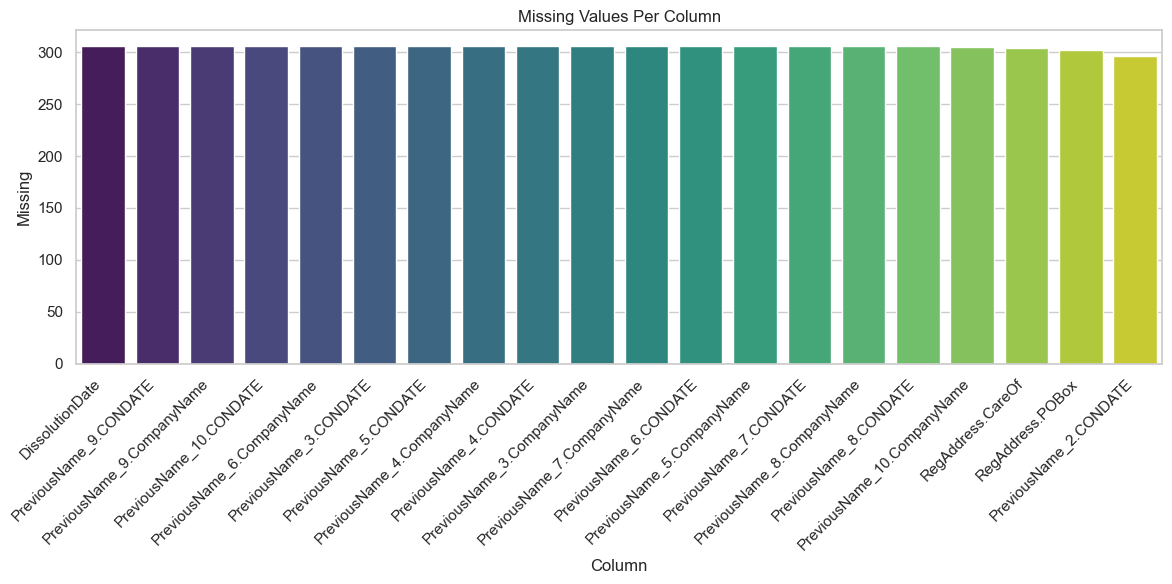

C:\Users\HP\AppData\Local\Temp\ipykernel_23348\2091308271.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=section_data, x='column', y=value_col, palette='viridis')


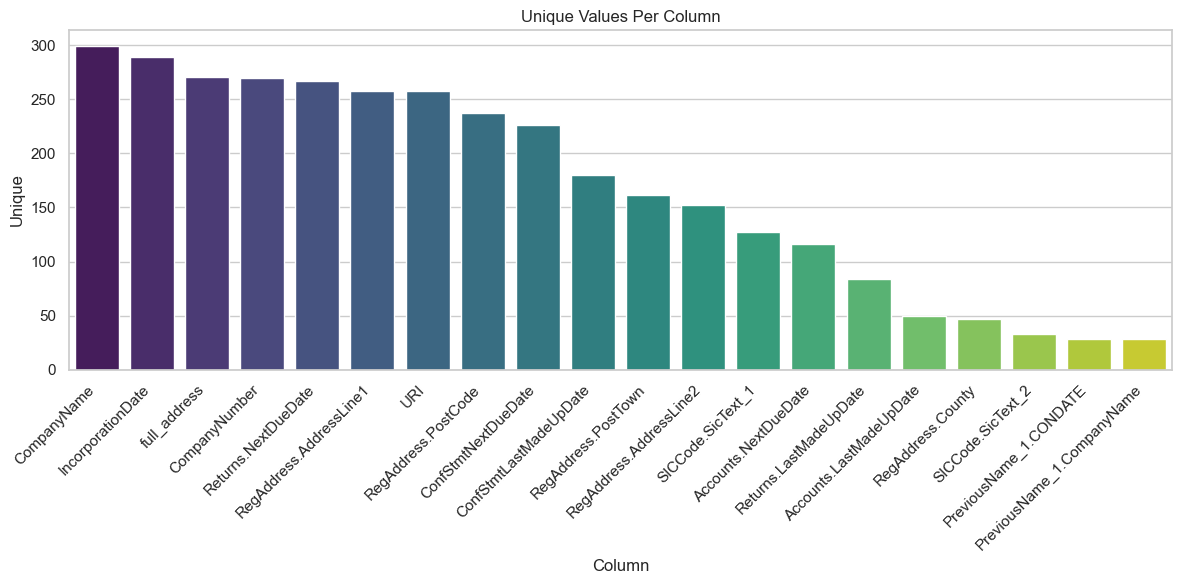

C:\Users\HP\AppData\Local\Temp\ipykernel_23348\2091308271.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=section_data, x='column', y=value_col, palette='viridis')


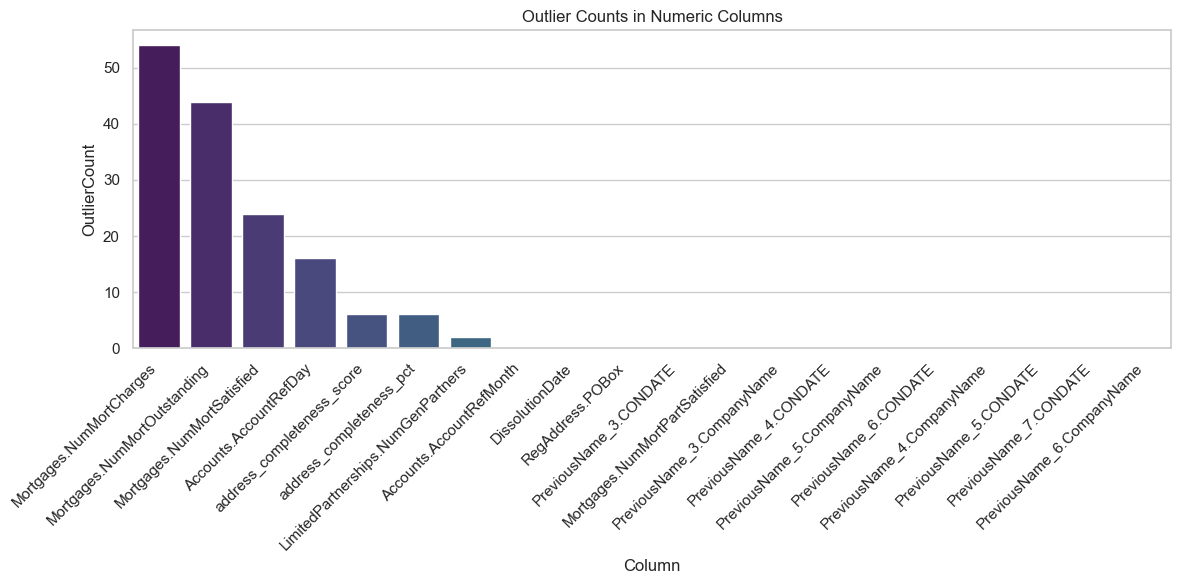

C:\Users\HP\AppData\Local\Temp\ipykernel_23348\2091308271.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=section_data, x='column', y=value_col, palette='viridis')


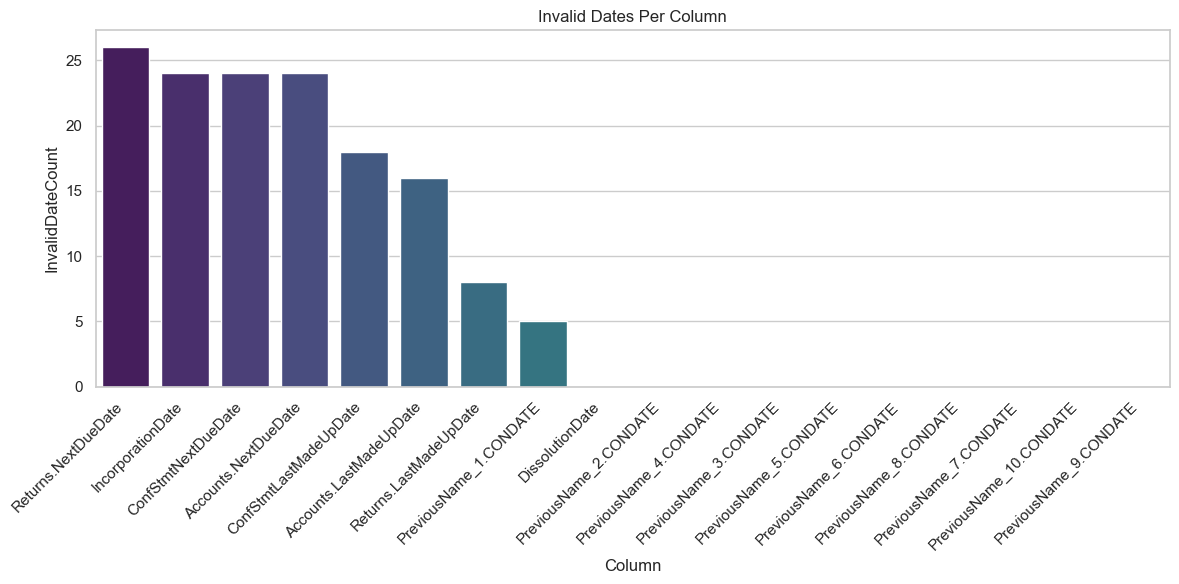

C:\Users\HP\AppData\Local\Temp\ipykernel_23348\2091308271.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Duplicate Percentage'], y=[val], palette='magma')


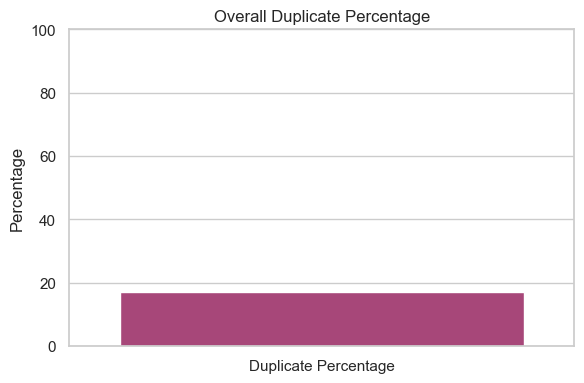

In [633]:
#Plotting Profiled Data
def plot_profiling_section(report_df, section_name, value_col, title, top_n=20):
    section_data = report_df[report_df['section'] == section_name]
    section_data = section_data.sort_values(by=value_col, ascending=False).head(top_n)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=section_data, x='column', y=value_col, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('Column')
    plt.ylabel(value_col)
    plt.tight_layout()
    plt.show()
profile_df = profile_dataframe_as_df(df, dup_key='CompanyNumber')

# Plot missing values
plot_profiling_section(profile_df, 'missing', 'Missing', 'Missing Values Per Column')

# Plot unique counts
plot_profiling_section(profile_df, 'unique', 'Unique', 'Unique Values Per Column')

# Plot outlier counts
plot_profiling_section(profile_df, 'outliers', 'OutlierCount', 'Outlier Counts in Numeric Columns')

# Plot invalid dates
plot_profiling_section(profile_df, 'invalid_dates', 'InvalidDateCount', 'Invalid Dates Per Column')

# Plot duplicates (single row bar, still helpful)
dup_stats = profile_df[profile_df['section'] == 'duplicates']
if not dup_stats.empty:
    val = dup_stats['DuplicatePct'].values[0]
    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Duplicate Percentage'], y=[val], palette='magma')
    plt.title('Overall Duplicate Percentage')
    plt.ylim(0, 100)
    plt.ylabel('Percentage')
    plt.tight_layout()
    plt.show()


In [665]:
import re

# UK Company Number Pattern: 8 digits or 2 letters + 6 digits
CRN_PATTERN = re.compile(r'^(?:\d{8}|[A-Z]{2}\d{6})$')

def count_invalid_company_numbers(df, col='CompanyNumber'):
    s = df[col].astype(str).str.strip().str.upper()
    mask = ~s.str.fullmatch(CRN_PATTERN, na=False)
    return int(mask.sum())

def generate_data_quality_report(df: pd.DataFrame, report_df: pd.DataFrame, key='CompanyNumber', custom_rules: dict = None):
    n_rows, n_cols = df.shape
    total_cells = n_rows * n_cols
    dq = {}  

    # 1. Completeness
    missing = report_df.loc[report_df['section'] == 'missing', 'Missing'].sum()
    dq['completeness_pct'] = round((1 - missing / total_cells) * 100, 2)

    # 2. Uniqueness (based on key column)
    if key in df.columns:
        dq['uniqueness_pct'] = round((df[key].nunique() / n_rows) * 100, 2)
    else:
        dq['uniqueness_pct'] = None

    # 3. Duplicate quality
    dup_rows = report_df.query("section == 'duplicates'")['TotalDupRows'].sum() if 'duplicates' in report_df['section'].values else 0
    dq['duplicate_quality_pct'] = round((1 - dup_rows / n_rows) * 100, 2) if n_rows else 100.0

    # 4. Invalid records
    invalid_dates = report_df.query("section == 'invalid_dates'")['InvalidDateCount'].sum()
    invalid_postcodes = report_df.query("section == 'invalid_postcodes'")['InvalidPostCodeSample'].notna().sum()
    invalid_crn = count_invalid_company_numbers(df, key) if key in df else 0

    # Address validity
    if 'InvalidFullAddressSample' in report_df.columns:
        invalid_addresses = report_df.query("section == 'invalid_full_address'")['InvalidFullAddressSample'].dropna().count()
    else:
        invalid_addresses = 0

    total_invalid = invalid_dates + invalid_postcodes + invalid_crn + invalid_addresses
    dq['validity_pct'] = round((1 - total_invalid / total_cells) * 100, 2)

    # 5. Address completeness (if address available)
    if 'address_completeness_score' in df.columns:
        address_cols = [col for col in df.columns if col.startswith('RegAddress.')]
        max_score = len(address_cols)
        avg_score = df['address_completeness_score'].mean()
        dq['address_completeness_pct'] = round((avg_score / max_score) * 100, 2)
    else:
        dq['address_completeness_pct'] = None

    # 6. Address validity
    dq['address_validity_pct'] = round((1 - invalid_addresses / n_rows) * 100, 2) if invalid_addresses else None

    # 7. Company number validity
    dq['companynumber_validity_pct'] = round((1 - invalid_crn / n_rows) * 100, 2) if key in df else None

    # 8. Rule violations summary
    dq['rule_violations'] = {
        'invalid_dates': int(invalid_dates),
        'invalid_postcodes': int(invalid_postcodes),
        'invalid_addresses': int(invalid_addresses),
        'invalid_companynumbers': int(invalid_crn),
    }

    # 9. Custom rule checks (optional)
    if custom_rules:
        dq['custom_rules'] = {}
        for rule_name, rule_func in custom_rules.items():
            try:
                result = rule_func(df)
                dq['custom_rules'][rule_name] = result
            except Exception as e:
                dq['custom_rules'][rule_name] = f"Error: {e}"

    # 10. Overall Score
    components = [dq['completeness_pct'], dq['uniqueness_pct'], dq['validity_pct'], dq['duplicate_quality_pct']]
    dq['overall_data_quality_pct'] = round(sum(filter(None, components)) / len(components), 2)

    return dq
# dq_report = generate_data_quality_report(df, report_df, key='CompanyNumber')
# display(dq_report)


#ADD Custom Rules
def check_negative_turnover(df):
    if 'Turnover' in df.columns:
        return (df['Turnover'] < 0).sum()
    return 'Not applicable'

def check_missing_sic_code(df):
    if 'SICCode.SicText_1' in df.columns:
        return df['SICCode.SicText_1'].isnull().sum()
    return 'Not applicable'

custom_rules = {
    'CompanyCategoryInvalid': lambda df: (
        df['CompanyCategory'].astype(str)
          .apply(lambda x: x != x.strip())
          .sum()
    ) if 'CompanyCategory' in df.columns else 0,

    'check_missing_sic_code': check_missing_sic_code
}

dq_report = generate_data_quality_report(df, report_df, key='CompanyNumber', custom_rules=custom_rules)
display(dq_report)

{'completeness_pct': np.float64(51.06),
 'uniqueness_pct': 88.24,
 'duplicate_quality_pct': np.float64(83.01),
 'validity_pct': np.float64(98.47),
 'address_completeness_pct': np.float64(56.58),
 'address_validity_pct': None,
 'companynumber_validity_pct': 63.4,
 'rule_violations': {'invalid_dates': 145,
  'invalid_postcodes': 14,
  'invalid_addresses': 0,
  'invalid_companynumbers': 112},
 'custom_rules': {'CompanyCategoryInvalid': np.int64(0),
  'check_missing_sic_code': np.int64(0)},
 'overall_data_quality_pct': np.float64(80.2)}

In [667]:
#keep
import pandas as pd
import numpy as np
import re
import requests
from requests.auth import HTTPBasicAuth
from fuzzywuzzy import fuzz
from IPython.display import display

# -- Parameters --
API_KEY = ""

# -- Full cleaning 
def clean_standardize(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    address_cols = [col for col in df.columns if col.startswith('RegAddress.') and col not in ['RegAddress.CareOf']]
    company_info_cols = ['CompanyStatus', 'CompanyCategory']

    # 1. Address and string cleaning
    df[address_cols] = df[address_cols].astype(str).apply(lambda x: x.str.title())
    df[company_info_cols] = df[company_info_cols].astype(str).apply(lambda col: col.str.title())
    df['CompanyName'] = df['CompanyName'].astype(str).str.upper()
    
    df['Accounts.AccountCategory'] = df['Accounts.AccountCategory'].astype(str).str.upper()
    df['RegAddress.PostCode'] = df['RegAddress.PostCode'].astype(str).str.strip().str.upper()

    # 2. CompanyNumber cleaning
    if 'CompanyNumber' in df.columns:
        df['CompanyNumber'] = df['CompanyNumber'].astype(str).str.strip()
        df['CompanyNumber'] = df['CompanyNumber'].replace(['', 'nan', 'NaN', 'NONE', 'None', 'null'], pd.NA)
        valid_mask = df['CompanyNumber'].notna() & df['CompanyNumber'].str.match(r'^\d+$')
        df.loc[valid_mask, 'CompanyNumber'] = df.loc[valid_mask, 'CompanyNumber'].str.zfill(8)
        invalid_mask = df['CompanyNumber'].notna() & ~df['CompanyNumber'].str.match(r'^\d{8}$')
        df.loc[invalid_mask, 'CompanyNumber'] = pd.NA

    # 3. Address validation
    postcode_pattern = re.compile(r'^(GIR 0AA|[A-Z]{1,2}[0-9][0-9A-Z]? ?[0-9][ABD-HJLNP-UW-Z]{2})$')
    pc = df['RegAddress.PostCode'].astype(str).str.strip()
    mask_invalid = pc.notna() & (pc != '') & ~pc.str.fullmatch(postcode_pattern, na=False)
    df['invalid_postcode'] = pc.where(mask_invalid)
    df['full_address'] = df[address_cols].apply(
        lambda row: ', '.join(comp for comp in row.astype(str).str.strip() if pd.notna(comp) and comp.lower() != 'nan'),
        axis=1
    )
    df['address_completeness'] = df[address_cols].notnull().sum(axis=1)

    # 4. Standardize dates
    date_cols = [c for c in df.columns if 'date' in c.lower()]
    if date_cols:
        df[date_cols] = df[date_cols].astype(str).apply(lambda col: col.str.replace(r'[\/\-.]', '', regex=True))
        df[date_cols] = df[date_cols].apply(pd.to_datetime, format='%d%m%Y', errors='coerce')
        df[date_cols] = df[date_cols].apply(lambda s: s.dt.strftime('%d/%m/%Y'))

   
    return df

cleaned_df = clean_standardize(df)
# display(cleaned_df.head())


In [668]:
df = cleaned_df
#display(df)

In [639]:


# display(df['CompanyName'])

# API_KEY = ''  # Replace with your actual API key
API_KEY =''

def search_company(name):
    try:
        url = f"https://api.company-information.service.gov.uk/search/companies?q={name}"
        response = requests.get(url, auth=HTTPBasicAuth(API_KEY, ''))

        if response.status_code == 200:
            results = response.json()
            if results.get('items'):
                return results['items'][0]
            else:
                print(f"No items found for company: {name}")
        else:
            print(f"Error: {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:
        print(f"Request failed for company '{name}': {e}")
    except Exception as e:
        print(f"Unexpected error for company '{name}': {e}")
    
    return None
# Matching with delay
matches = []

for name in df['CompanyName']:
    if pd.isnull(name):
        matches.append(None)
        print("none")
    else:
        match = search_company(name)
        #print(match)
        matches.append(match)
        time.sleep(0.5)

df['ch_match'] = matches

def extract_info(match):
    
    try:
  #      if isinstance(match, dict):
            return {
                'matched_name': match.get('title'),
                'company_number': match.get('company_number'),
                'status': match.get('company_status'),
                'address_snippet': match.get('address_snippet'),
                'date_of_creation': match.get('date_of_creation'),
                'date_of_cessation' : match.get('date_of_cessation'),
                'po_box' : match.get('address', {}).get('po_box')         
            }
    except Exception as e:
        print(f"Error extracting info: {e}")
    return None



df['match_info'] = df['ch_match'].apply(extract_info)
info_df = pd.json_normalize(df['match_info'])
df = pd.concat([df, info_df], axis=1)

# Fuzzy name match score
df['name_similarity'] = df.apply(
    lambda x: fuzz.ratio(x['CompanyName'], x['matched_name']) if pd.notnull(x['matched_name']) else 0,
    axis=1
)

# Flags for validation
df['match_found'] = df['matched_name'].notnull()
df['is_valid'] = df['match_found'] & (df['name_similarity'] >= 95)


# Summary metrics
total_records = len(df)
matched_records = df['match_found'].sum()
unmatched = total_records - matched_records
active_companies = (df['status'] == 'active').sum()

high_confidence = (df['name_similarity'] > 95).sum()

summary = {
    'Total Records': total_records,
    'Companies Matched': matched_records,
    'Active Companies': active_companies,
    'High-Confidence Matches (≥85)': high_confidence,
    'Unmatched Records': unmatched
}
summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Count'])
display(summary_df)

#List of companies that did not match
unmatched_df = df[df['match_found'] == False][['CompanyName']]
unmatched_df = unmatched_df.drop_duplicates().sort_values(by='CompanyName')

print("Companies not matched to Companies House:")
display(unmatched_df)
#filter results
df = df[~df['CompanyName'].isin(unmatched_df['CompanyName'])]




No items found for company: AIRLINEOLUTIONS LTD
Error extracting info: 'NoneType' object has no attribute 'get'


,Count
Total Records,306
Companies Matched,305
Active Companies,246
High-Confidence Matches (≥85),267
Unmatched Records,1


Companies not matched to Companies House:


,CompanyName
300,AIRLINEOLUTIONS LTD


In [650]:
cols_to_drop = [
    'ch_match',	'match_info'
]

# Drop columns only if they exist in the DataFrame
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


In [651]:
#Enrich data

#Fill missing Company Numbers
missing_before = df['CompanyNumber'].isnull().sum()
print(f"Missing Company Numbers (before): {missing_before}")

check_valid_com = df['CompanyNumber'].isnull() & (df['name_similarity'] > 85)

# Apply conditional fill
df.loc[check_valid_com, 'CompanyNumber'] = df.loc[check_valid_com, 'company_number']

# Flag which ones were filled
df['company_number_filled'] = check_valid_com & df['company_number'].notnull()

#df['CompanyNumber'] = df['CompanyNumber'].fillna(df['company_number'])
missing_after = df['CompanyNumber'].isnull().sum()
filled = missing_before - missing_after
print(f"Missing Company Numbers filled: {filled}")

# Fill missing POBox 
missing_po_before = df['RegAddress.POBox'].isnull().sum()
print(f"Missing POBox (before): {missing_po_before}")

# Condition: POBox is missing and name_similarity > 85
check_valid_po = df['RegAddress.POBox'].isnull() & (df['name_similarity'] > 85)

# Fill from matched data
df.loc[check_valid_po, 'RegAddress.POBox'] = df.loc[check_valid_po, 'po_box']

# Flag rows that were filled
df['po_box_filled'] = check_valid_po & df['po_box'].notnull()

missing_po_after = df['RegAddress.POBox'].isnull().sum()
filled_po = missing_po_before - missing_po_after
print(f"POBox filled: {filled_po}")


# Fill missing DissolutionDate 
missing_diss_before = df['DissolutionDate'].isnull().sum()
print(f"Missing DissolutionDate (before): {missing_diss_before}")

# Condition: DissolutionDate is missing and name_similarity > 85
check_valid_diss = df['DissolutionDate'].isnull() & (df['name_similarity'] > 85)

parsed = pd.to_datetime(
    df.loc[check_valid_diss, 'date_of_cessation'], errors='coerce'
)

df.loc[check_valid_diss, 'DissolutionDate'] = parsed.dt.strftime('%d/%m/%Y')

# Flag rows that were filled
df['dissolution_date_filled'] = check_valid_diss & df['date_of_cessation'].notnull()

missing_diss_after = df['DissolutionDate'].isnull().sum()
filled_diss = missing_diss_before - missing_diss_after
print(f"Dissolution Dates filled: {filled_diss}")


#company_status

df['status'] = df['status'].astype(str).str.title()
df['CompanyStatus'] = df['CompanyStatus'].astype(str).str.title()

before_status_counts = df['CompanyStatus'].value_counts(dropna=False).rename('Before')

# STEP 2: Enrichment logic (optional: update CompanyStatus if matched)
mask = (
    (df['name_similarity'] > 85) &
    (df['CompanyNumber'].fillna('').astype(str).str.zfill(8) ==
     df['company_number'].fillna('').astype(str).str.zfill(8))
)

df.loc[mask, 'CompanyStatus'] = df.loc[mask, 'status']

# STEP 3: Count distinct CompanyStatus values AFTER enrichment
after_status_counts = df['CompanyStatus'].value_counts(dropna=False).rename('After')

# STEP 4: Combine for comparison
status_comparison = pd.concat([before_status_counts, after_status_counts], axis=1).fillna(0).astype(int)

# Display results
print("📊 CompanyStatus counts before and after enrichment:")
display(status_comparison)



Missing Company Numbers (before): 26
Missing Company Numbers filled: 0
Missing POBox (before): 0
POBox filled: 0
Missing DissolutionDate (before): 264
Dissolution Dates filled: 0
📊 CompanyStatus counts before and after enrichment:


,Before,After
CompanyStatus,,
Active,253,253
Dissolved,41,41
Liquidation,7,7
Registered,1,1
Removed,1,1
Open,1,1
Active - Proposal To Strike Off,1,1


In [659]:
# display(df.head())

In [653]:
#Deduplication
#Sort by CompanyNumber and IncorporationDate (nulls last)
df_sorted = df.sort_values(
    by=['CompanyNumber', 'IncorporationDate'],
    ascending=[True, True],
    na_position='last'  # Ensures null dates are treated as "latest"
)

#Drop duplicates from sorted DataFrame
before_drop = len(df_sorted)
df_deduped = df_sorted.drop_duplicates(subset=['CompanyNumber'], keep='first')
after_drop = len(df_deduped)
dropped = before_drop - after_drop

print(f"Dropped {dropped} duplicate rows based on CompanyNumber.")
print(f"Old dataset size: {before_drop} rows")
print(f"New dataset size: {after_drop} rows")
print("Remaining duplicates:", df_deduped.duplicated(subset=['CompanyNumber']).sum())

#Assign final deduplicated DataFrame back
df = df_deduped.reset_index(drop=True)

Dropped 45 duplicate rows based on CompanyNumber.
Old dataset size: 305 rows
New dataset size: 260 rows
Remaining duplicates: 0


In [654]:

cols_to_drop = [
    'matched_name',
    'company_number',
    'status',
    'address_snippet',
    'date_of_creation',
    'date_of_cessation',
    'po_box',
    'invalid_postcode',	'address_completeness',	'matched_name',	'company_number',
    'match_found',
    'is_valid','ch_match',	'match_info'
]

# Drop columns only if they exist in the DataFrame
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)



In [655]:
# display(df.head())

In [656]:
report_df = profile_dataframe_as_df(df, dup_key='CompanyNumber')

# Save old DQ report
old_dq = dq_report

# Generate new one based on updated profile
dq_report = generate_data_quality_report(df, report_df, key='CompanyNumber')

# Convert to DataFrames
old_dq_df = pd.DataFrame.from_dict(old_dq, orient='index', columns=['Before'])
new_dq_df = pd.DataFrame.from_dict(dq_report, orient='index', columns=['After'])

# Compare
dq_comparison = pd.concat([old_dq_df, new_dq_df], axis=1)
display(dq_comparison)

,Before,After
completeness_pct,51.06,58.37
uniqueness_pct,88.24,99.62
duplicate_quality_pct,83.01,100.0
validity_pct,98.47,98.34
address_completeness_pct,56.58,75.0
address_validity_pct,None,None
companynumber_validity_pct,63.4,99.62
rule_violations,"{'invalid_dates': 145, 'invalid_postcodes': 14, 'invalid_addresses': 0, 'invalid_companynumbers': 112}","{'invalid_dates': 260, 'invalid_postcodes': 7, 'invalid_addresses': 0, 'invalid_companynumbers': 1}"
custom_rules,"{'CompanyCategoryInvalid': 0, 'check_missing_sic_code': 0}",NaN
overall_data_quality_pct,80.2,89.08


In [657]:

#Save to CSV
df.to_csv('Final_output_companies.csv', index=False)

In [ ]:
profile_df = profile_dataframe_as_df(df, dup_key='CompanyNumber')

# Plot missing values
plot_profiling_section(profile_df, 'missing', 'Missing', 'Missing Values Per Column')

# Plot unique counts
plot_profiling_section(profile_df, 'unique', 'Unique', 'Unique Values Per Column')

# Plot outlier counts
plot_profiling_section(profile_df, 'outliers', 'OutlierCount', 'Outlier Counts in Numeric Columns')

# Plot invalid dates
plot_profiling_section(profile_df, 'invalid_dates', 'InvalidDateCount', 'Invalid Dates Per Column')

# Plot duplicates (single row bar, still helpful)
dup_stats = profile_df[profile_df['section'] == 'duplicates']
if not dup_stats.empty:
    val = dup_stats['DuplicatePct'].values[0]
    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Duplicate Percentage'], y=[val], palette='magma')
    plt.title('Overall Duplicate Percentage')
    plt.ylim(0, 100)
    plt.ylabel('Percentage')
    plt.tight_layout()
    plt.show()